--------------------------------------------------------------------------

# Classification Models

--------------------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import statsmodels as stats
from numpy import mean, absolute, sqrt

In [ ]:
df_60 = pd.read_csv("data/dataset-of-60s-clean.csv")
df_70 = pd.read_csv("data/dataset-of-70s-clean.csv")
df_80 = pd.read_csv("data/dataset-of-80s-clean.csv")
df_90 = pd.read_csv("data/dataset-of-90s-clean.csv")
df_00 = pd.read_csv("data/dataset-of-00s-clean.csv")
df_10 = pd.read_csv("data/dataset-of-10s-clean.csv")
df_all = pd.read_csv("data/dataset-alldecades-clean.csv")
#pop_df = pd.read_csv("data/song_data.csv")

---------------------------------------------------------

### Model 1: Decision Tree Classifier

----------------------------------------------------------

Import libraries

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Create a training and testing set

In [ ]:
features = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_min', 'time_signature', 'chorus_hit',
       'sections']
x = df_all[features]
y = df_all["target"]

x_train, x_test, y_train, y_test = train_test_split(x[features], y, train_size = 0.8, random_state = 8)

In [ ]:
tree_model = DecisionTreeClassifier(criterion = "gini", random_state = 8, max_depth = 8, min_samples_leaf = 5)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, random_state=8)

In [ ]:
tree_ypredict = tree_model.predict(x_test)

In [ ]:
accuracy_score(y_test, tree_ypredict)

0.7591826806129895

In [ ]:
np.mean(cross_val_score(tree_model, x, y, cv = 5))

0.7257601971042531

In [ ]:
# RMSE_scores = []

# for depth in range(1, 15):
#     tree_model = DecisionTreeClassifier(criterion = "gini", random_state = 42, max_depth = depth, min_samples_leaf = 5)
#     MSE_scores = cross_val_score(tree_model, x, y, cv = 5, scoring = 'neg_mean_squared_error')
#     RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
    
# plt.plot(range(1, 15), RMSE_scores);
# plt.xlabel('Max Depth');
# plt.ylabel('RMSE');

--------------------------------------------------------------------

### Model 2: Random Forest

--------------------------------------------------------------------

In [ ]:
from sklearn import datasets

In [ ]:
forest_model = RandomForestClassifier(n_estimators = 100)

In [ ]:
forest_model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
forest_ypredict = forest_model.predict(x_test)

In [ ]:
metrics.accuracy_score(y_test, forest_ypredict)

0.7897105327171005

----------------------------------------------------------

### Model 3: K-Nearest Neighbors

----------------------------------------------------------

In [ ]:
features = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_min', 'time_signature', 'chorus_hit',
       'sections']
x = df_all[features]
y = df_all["target"]

x_train, x_test, y_train, y_test = train_test_split(x[features], y, train_size = 0.8, random_state = 8)

In [ ]:
K = []
training = []
testing = []
scores = {}

for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    
    training_score = knn.score(x_train, y_train)
    test_score = knn.score(x_test, y_test)
    K.append(k)
    
    training.append(training_score)
    testing.append(test_score)
    scores[k] = [training_score, test_score]

In [ ]:
# for keys, values in scores.items():
#     print(keys, ':', values)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_ypredict = knn.predict(x_train)

In [ ]:
metrics.accuracy_score(y_train, knn_ypredict)

0.9995742610388031

What if we reduced the number of features to the most important ones?

In [ ]:
class_features = ['instrumentalness', 'acousticness', 'danceability', 'energy', 'loudness']
x = df_all[class_features]
y = df_all["target"]

x_train, x_test, y_train, y_test = train_test_split(x[class_features], y, train_size = 0.8, random_state = 8)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)
prediction = knn.predict(x_train)
print('With KNN (K=1) train accuracy is: ', knn.score(x_train,y_train))
print('With KNN (K=1) test accuracy is: ', knn.score(x_test,y_test))

With KNN (K=1) train accuracy is:  0.9995742610388031
With KNN (K=1) test accuracy is:  0.6752614935538799


In [ ]:
metrics.accuracy_score(y_train, prediction)

0.9995742610388031

Okay, a bit better? But what's the optimum K-value?

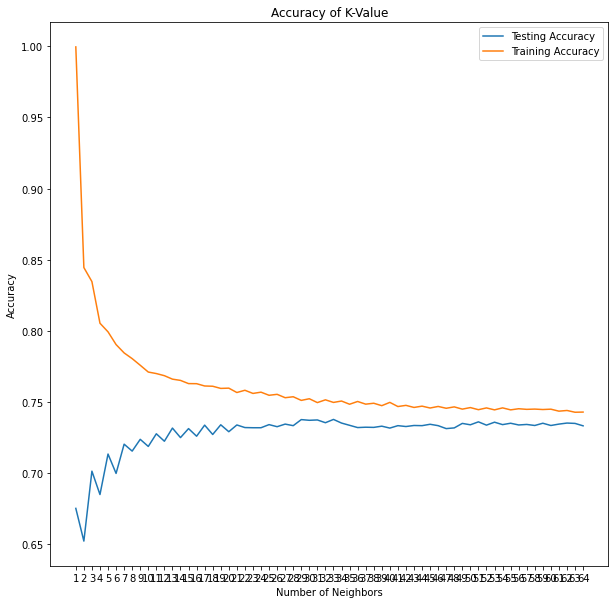

Best accuracy is 0.7377766966674775 with K = 33


In [ ]:
k_range = range(1, 65)
train_accuracy = []
test_accuracy = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[10,10])
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Accuracy of K-Value')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [ ]:
k = 33
cv_result = cross_val_score(knn,x_train,y_train,cv=k)  
print('Cross_val Score: ', np.mean(cv_result))

Cross_val Score:  0.6757380575461323


In [ ]:
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) 
knn_cv.fit(x,y)
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best accuracy: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 34}
Best accuracy: 0.7114533158176423


### Confusion matrix

In [ ]:
features = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_min', 'time_signature', 'chorus_hit',
       'sections']
x = df_all[features]
y = df_all["target"]

x_train, x_test, y_train, y_test = train_test_split(x[features], y, train_size = 0.8, random_state = 8)

In [ ]:
forest_model = RandomForestClassifier(n_estimators = 100)

In [ ]:
forest_model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
forest_ypredict = forest_model.predict(x_test)

In [ ]:
metrics.accuracy_score(y_test, forest_ypredict)

0.7916565312576016

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cmat = confusion_matrix(y_test, forest_ypredict)
print(cmat)
true_neg, false_pos, false_neg, true_pos = cmat.ravel()
print(true_neg, false_pos, false_neg, true_pos)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - Flase Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
accuracy = ((true_neg+true_pos)/(true_neg+false_pos+false_neg+true_pos))
print('Accuracy Score: {}'.format(accuracy))
print('Misclassification Rate: {}'.format((false_pos+false_neg)/(true_neg+false_pos+false_neg+true_pos)))

[[3010 1043]
 [ 670 3499]]
3010 1043 670 3499
TP - True Negative 3010
FP - Flase Positive 1043
FN - False Negative 670
TP - True Positive 3499
Accuracy Score: 0.7916565312576016
Misclassification Rate: 0.20834346874239845
